# **Load the Dataset as copy API command**

In [1]:
!kaggle datasets download -d fmendes/fmendesdat263xdemos

Dataset URL: https://www.kaggle.com/datasets/fmendes/fmendesdat263xdemos
License(s): unknown
  0% 0.00/296k [00:00<?, ?B/s]
100% 296k/296k [00:00<00:00, 34.2MB/s]


In [2]:
!unzip fmendesdat263xdemos.zip

Archive:  fmendesdat263xdemos.zip
  inflating: calories.csv            
  inflating: exercise.csv            


# **Import** **Libraries**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# **Read the Data**

Exercise Data

In [4]:
df=pd.read_csv('/content/exercise.csv') # Load the dataset into a DataFrame
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


Calories Data

In [5]:
ds=pd.read_csv('/content/calories.csv') # Load the dataset into a DataFrame
ds.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


Merge of exercise data and calories data

In [6]:
data=pd.merge(df,ds,on='User_ID')
data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


# **Preprocessing_1**

In [7]:
data.shape # The size of the data

(15000, 9)

In [8]:
data.info() # Some of information about data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [9]:
data.describe() # Some of statistic about data

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [10]:
data.isnull().sum() # Check about of null_values

,0
User_ID,0
Gender,0
Age,0
Height,0
Weight,0
Duration,0
Heart_Rate,0
Body_Temp,0
Calories,0


In [11]:
data.duplicated().sum() # Check about of duplicated_rows

0

# **Visualization_1**



Age


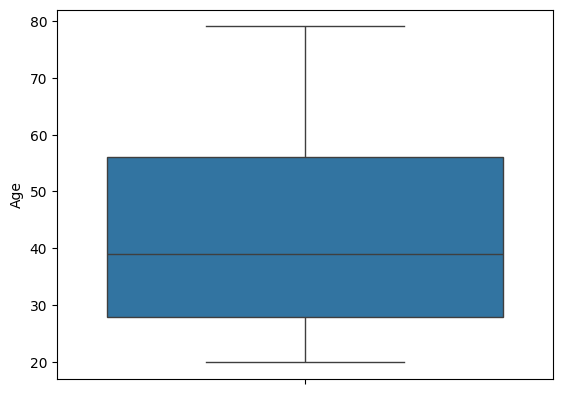

Height


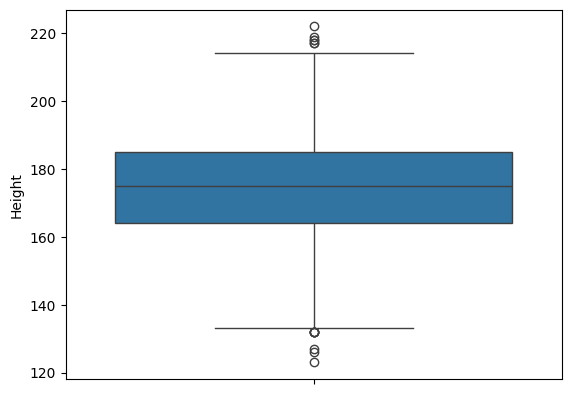

Weight


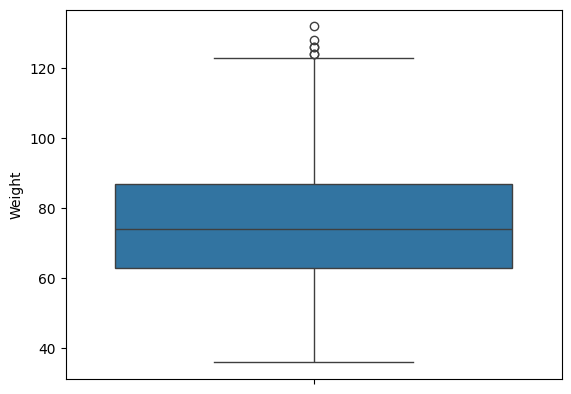

Duration


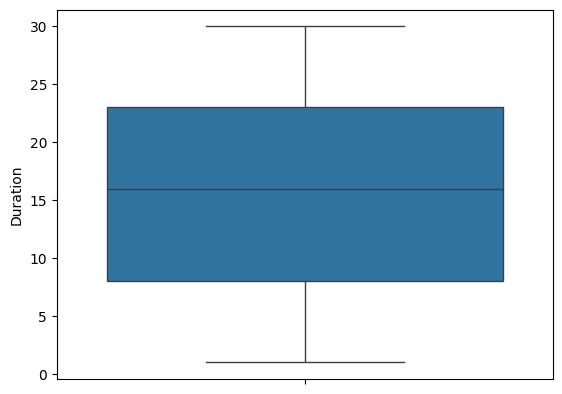

Heart_Rate


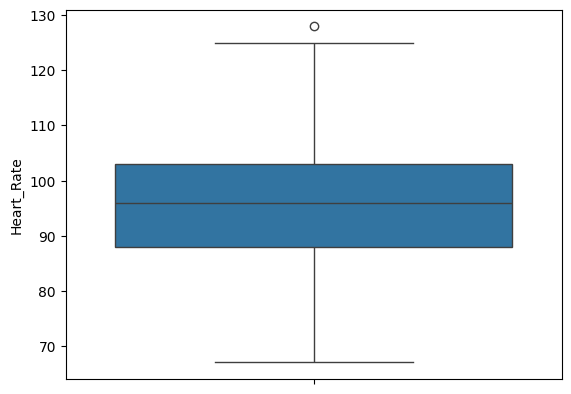

Body_Temp


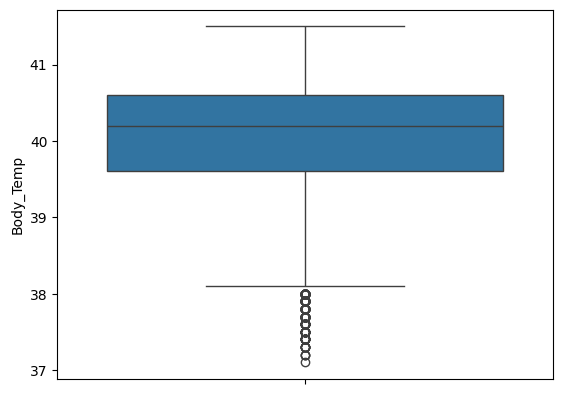

Calories


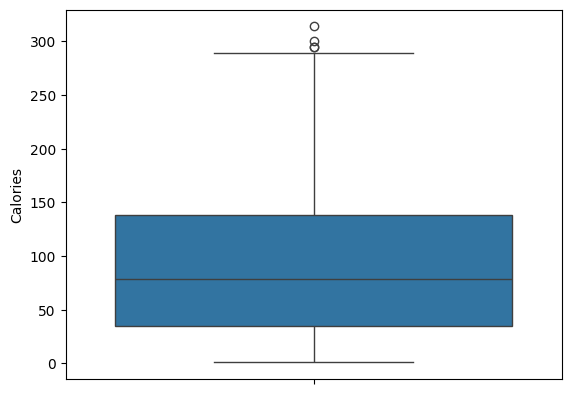

In [12]:
# Show all outliers of the data
column=data.drop(["User_ID","Gender"],axis=1)
for col in column:
  print(col)
  sns.boxplot(data[col])
  plt.show()

Age


<ipython-input-13-1d86fce762a2>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col],color='blue')


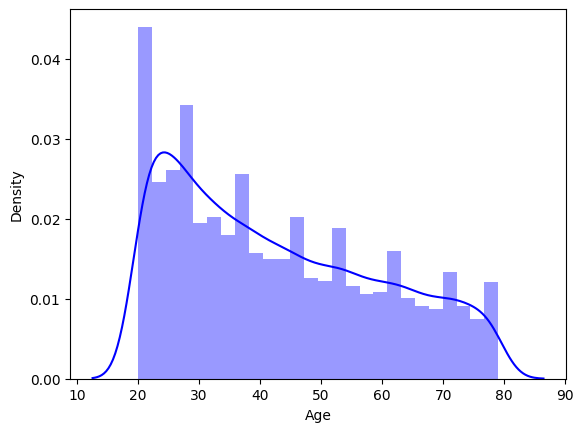

Height


<ipython-input-13-1d86fce762a2>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col],color='blue')


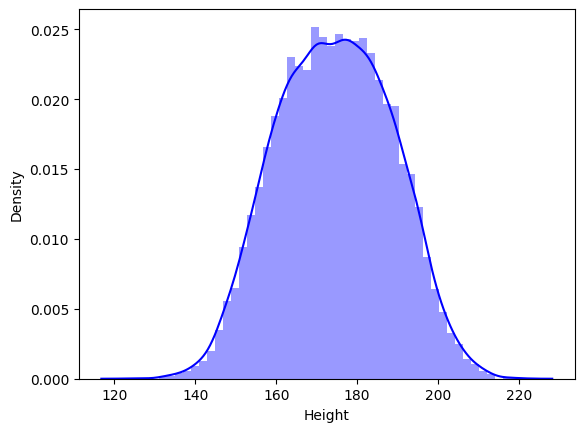

Weight


<ipython-input-13-1d86fce762a2>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col],color='blue')


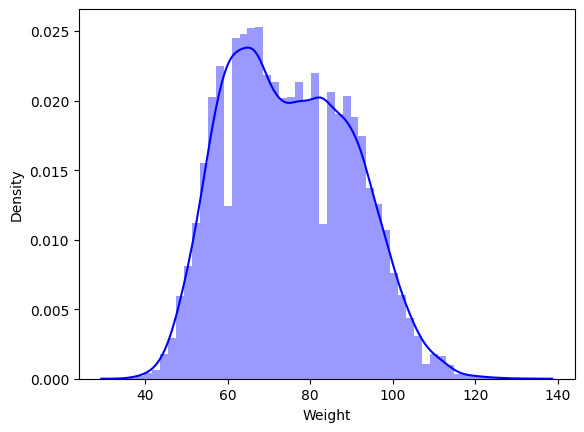

Duration


<ipython-input-13-1d86fce762a2>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col],color='blue')


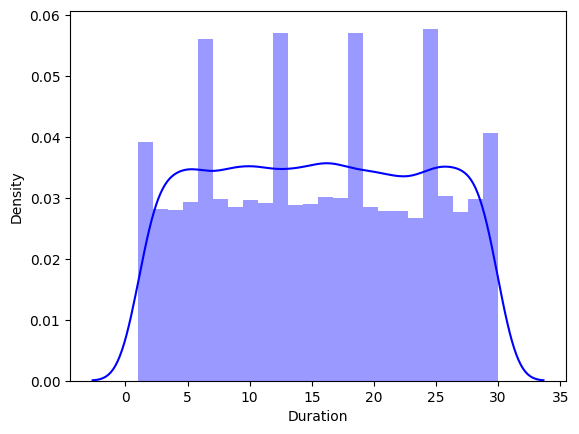

Heart_Rate


<ipython-input-13-1d86fce762a2>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col],color='blue')


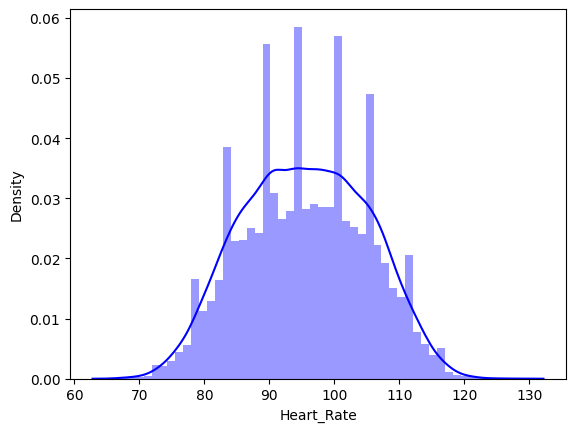

Body_Temp


<ipython-input-13-1d86fce762a2>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col],color='blue')


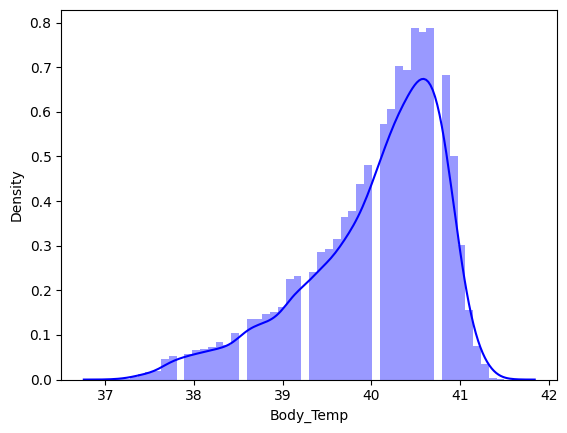

Calories


<ipython-input-13-1d86fce762a2>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col],color='blue')


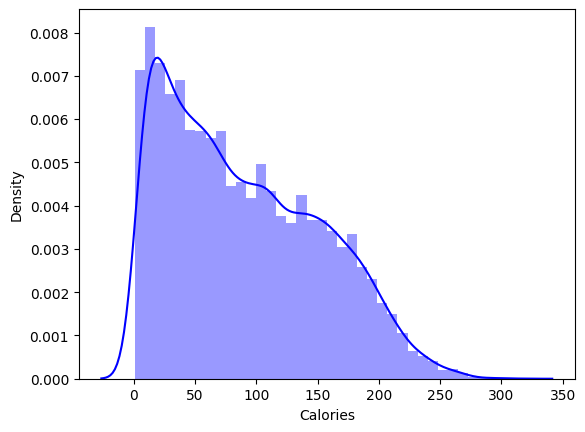

In [13]:
# show all distribution of the data
column=data.drop(["User_ID","Gender"],axis=1)
for col in column:
  print(col)
  sns.distplot(data[col],color='blue')
  plt.show()

<ipython-input-14-672a6ad3199c>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Gender',y='Calories',data=data,palette='muted')


<Axes: xlabel='Gender', ylabel='Calories'>

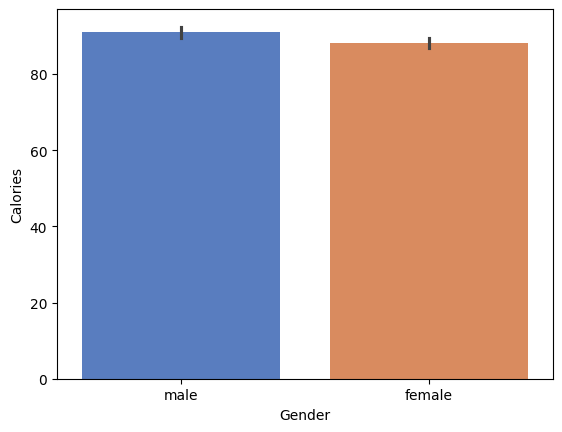

In [14]:
sns.barplot(x='Gender',y='Calories',data=data,palette='muted')

<Axes: xlabel='Age', ylabel='count'>

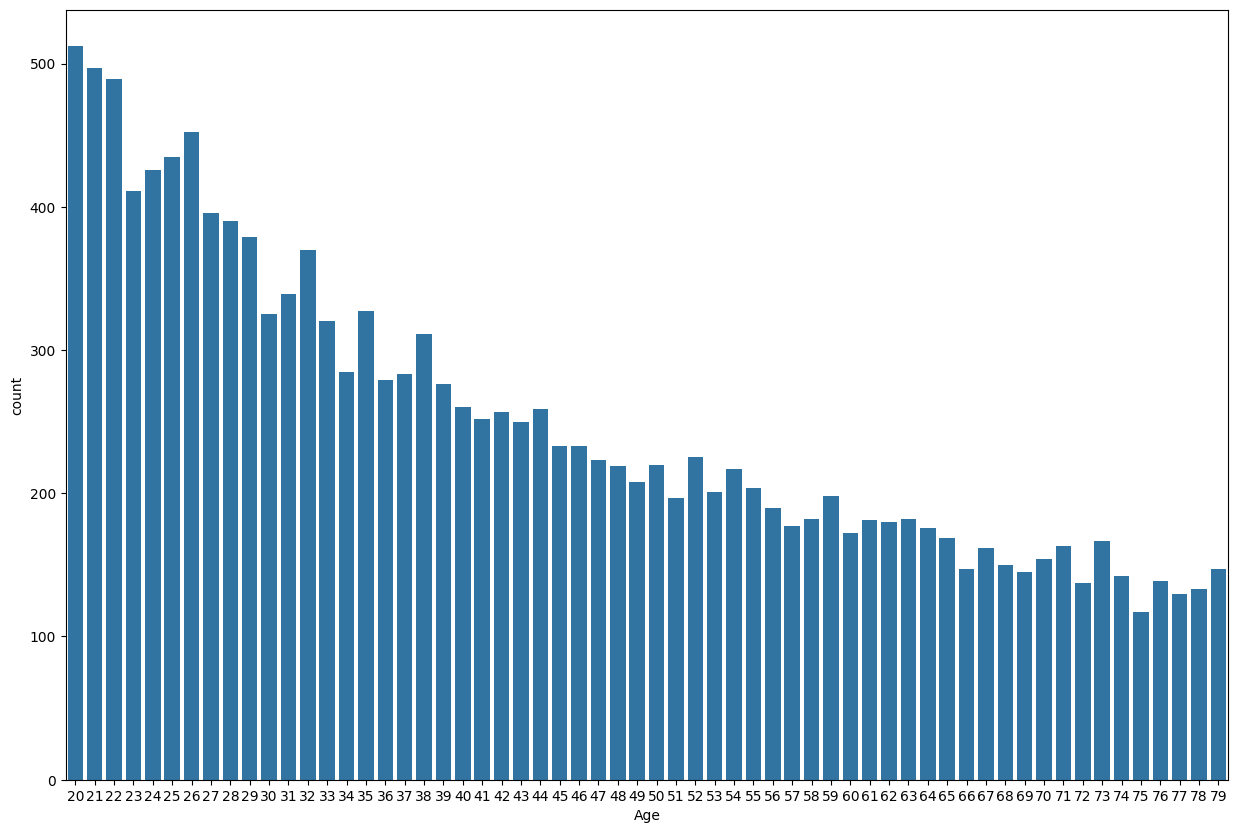

In [15]:
plt.figure(figsize=(15,10))
sns.countplot(data=data,x='Age')

# **Preprocessing_2**

In [16]:
# Encoding the data
label=LabelEncoder()
data['Gender']=label.fit_transform(data['Gender'])
data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,1,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,0,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,1,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,0,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,0,27,154.0,58.0,10.0,81.0,39.8,35.0


In [17]:
# Convert the datatype
data['Gender']=data['Gender'].astype('int64')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  int64  
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(3)
memory usage: 1.0 MB


# **Visualization_2**

<Axes: >

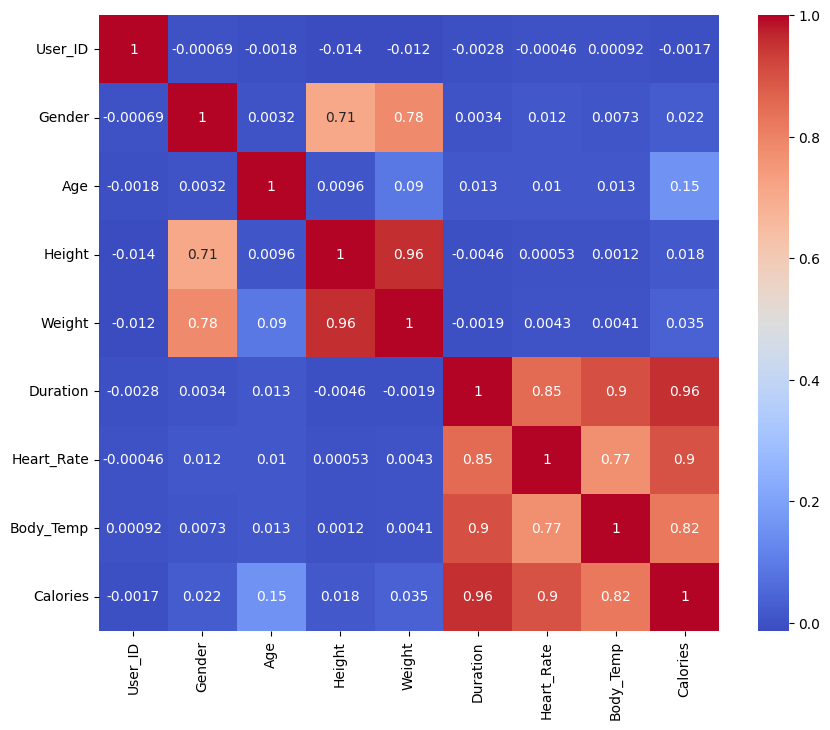

In [18]:
# Correlation between features
corr=data.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True, cmap='coolwarm')

# **Preprocessing_3**

In [19]:
# Drop unnecessary columns
data.drop('User_ID',axis=1,inplace=True)

In [20]:
# Handel the outliers
q1=data.quantile(0.25)
q3=data.quantile(0.75)
iqr=q3-q1
lower_bound=q1-(1.5*iqr)
upper_bound=q3+(1.5*iqr)
data=data[~((data<lower_bound)|(data>upper_bound)).any(axis=1)]

# **Training the model**

Split the data

In [21]:
X=data.drop('Calories',axis=1)
y=data['Calories']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

Evalute the model by RandomForest algorithm

In [22]:
param_grid = {
    'n_estimators': [10, 50, 100],            # Number of trees in the forest
    'max_depth': [10, 20, 30],          # Maximum depth of the trees
}
rf=RandomForestRegressor()
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
BaseEstimator=grid_search.best_estimator_
y_pred=BaseEstimator.predict(X_test)
print(r2_score(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))

0.9979183797730599
7.806369765380013


Evalute the model by XGBoost algorithm

In [23]:
model=XGBRegressor()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print(r2_score(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))

0.9987221585223152
4.792085966137495


# **Deployment**

In [26]:
import gradio as gr
# Prediction function
def predict_calories(Gender, Age, Height,Weight,Duration,Heart_Rate, Body_Temp):
    input_data = [[Gender, Age, Height,Weight,Duration,Heart_Rate, Body_Temp]]
    prediction = model.predict(input_data)
    return f"Predicted Calories Burnt: {prediction[0]:.2f}"

# Create Gradio interface
inputs = [
    gr.Number(label="Gender"),
    gr.Number(label="Age"),
    gr.Number(label="Height (cm)"),
    gr.Number(label="Weight (kg)"),
    gr.Number(label="Duration (mins)"),
    gr.Number(label="Heart Rate (bpm)"),
    gr.Number(label="Body Temperature (C)")
]

output = gr.Textbox(label="Calories Burnt Prediction")

gr.Interface(fn=predict_calories, inputs=inputs, outputs=output, title="Calories Burnt Prediction").launch()

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://f9bf19663b5de978dc.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
